<function matplotlib.pyplot.show(*args, **kw)>

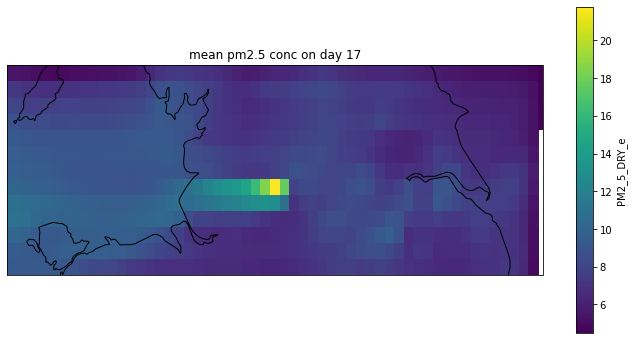

In [67]:
import netCDF4 as nc
import cartopy.io.shapereader as shpreader
from netCDF4 import Dataset
import xarray as xr
from cartopy import crs
import numpy as np
from cartopy.feature import NaturalEarthFeature
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors
import matplotlib as mpl
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import (OCEAN, LAKES, BORDERS, COASTLINE, RIVERS, COLORS,
                             LAND)
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)
from wrf import (getvar, to_np, vertcross, smooth2d, CoordPair, GeoBounds,
                 get_cartopy, latlon_coords, cartopy_xlim, cartopy_ylim)
from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords
from cartopy.util import add_cyclic_point
from matplotlib import ticker
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature


file = r'C:/Users/conno/OneDrive/Documents/pythonstuff/WRFfires.nc'
ds = xr.open_dataset(file) #this bit opens the file. I know what I'm doing, me
pm = ds["PM2_5_DRY_e"] #extracts pm2.5 data
day = 17
pm25 = pm[day*24:day*24+23,0,:,:].mean(dim='time') #creates the mean of all hourly results for the day specified above

#shapefile = r'C:/Users/conno/OneDrive/Documents/pythonstuff/cartopy_stuff/ne_10m_admin_1_states_provinces.shp'
#shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_1_states_provinces')
#reader = shpreader.Reader(shapefile)
#counties = reader.records()    #I'm trying to work out how to add the county boudaries with little joy so far
fig = plt.figure (figsize = (12, 6))
ax =plt.axes(projection = ccrs.Mercator(central_longitude = 1.96)) #creates the map to be plotted on. 1.96 is lon of Saddleworth Moor
ax.coastlines()
ax.set_extent([-4.9,0.7,53.1,54.4]) #need to check if this is correct. I'm not sure it's plotting the data at the right lon/lat automatically or if I need to pull the lon/lat from the dataset
pm25.plot(transform=ccrs.PlateCarree()) #seems to work, I think
plt.title (r'mean pm2.5 conc on day ' + str(day)) #adds title which changes based on the selected day
plt.show



In [46]:
lons = ds.longitude
lats = ds.latitude
print (ds)
print (ds[0,:,:])
#print ("maxvalue",ds.max(axis = (1,2)))
maxval = ds.max(keep_attrs = False)
ds.mean (axis = (0))
otherdata =ds.groupby("time")
print (otherdata)


#ds.mean(axis=(0)).head(23).plot.pcolormesh(figsize=(15,10)) #plotting mean of the first day

#try to figure out how to make plots for the mean of each day (start by trying mean of the first day)

for date in range(0,23): # this does each hour individually
    print (date)
    daytoplot = ds.mean (axis =(0))
    daytoplot.plot.pcolormesh(figsize=(15,10), levels = np.arange(0, 59, 10)) #manually set levels because coding is weird
    plt.show()
    

<xarray.DataArray 'PM2_5_DRY_e' (time: 673, latitude: 14, longitude: 57)>
[537054 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2018-06-16 ... 2018-07-14
    eta        float32 0.9965
  * latitude   (latitude) float64 53.05 53.15 53.25 53.35 ... 54.15 54.25 54.35
  * longitude  (longitude) float64 -4.898 -4.798 -4.698 ... 0.5022 0.6022 0.7022
Attributes:
    long_name:      PM2.5 aerosol dry mass
    standard_name:  PM2_5_DRY
    units:          ug m^-3
<xarray.DataArray 'PM2_5_DRY_e' (latitude: 14, longitude: 57)>
array([[     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [2.270898, 2.633288, 2.78805 , ..., 5.436743, 5.444637,      nan],
       [2.274444, 2.848363, 3.174696, ..., 5.564177, 5.55246 ,      nan],
       ...,
       [2.221792, 2.937978, 3.304687, ..., 8.195158, 6.974357, 4.340402],
       [2.232753, 2.902298, 3.144802, ..., 7.516822, 6.60069 , 4.429471],
       [2.454767, 2.902702, 3.392938, ..., 5.861372, 5.341529, 4.2

In [31]:
# not a clue what this is doing either

#fig = plt.figure(figsize=(12,6))    
#ax = plt.axes(projection = crs.Mercator(Min_lat = 14, )) #displays map of the UK
#ax.coastlines() #needs this to actually show the UK on the map that is supposed to cover the UK

In [ ]:
#(ds[date,:,:])